# UTS Deep Learning Number 1

Name: Austin Kane\
NIM: 270222932\
Dataset: [Dataset B](https://drive.google.com/drive/folders/1pThuel6dU23CLRseKzymT4oNDUECq_c6)\
Video Link: [Video1]()

# 1. Artificial Neural Network

Anda adalah seorang Data Scientist di perusahaan komersil. Tugas kalian adalah membuat model **Artificial Neural Network (ANN)** yang dapat menilai produktivitas setiap team dari perusahaan produsen pakaian.
Download dataset yang telah disediakan dan kerjakan task berikut ini.
1. [LO2 – 5 Poin] Lakukan **Exploratory Data Analysis (EDA)** untuk memahami kondisi data. Jelaskan semua masalah yang anda temukan pada dataset anda. Lakukan pre-processing pada dataset anda sesuai dengan hasil EDA anda, termasuk memisahkan dataset anda menjadi train, val, dan test dengan proporsi 70:10:20.
2. [LO2, LO3, & LO4 – 10 Poin] Buatlah **2 baseline model** dengan jumlah layer dan neuron yang berbeda. 1 model berupa **Sequential Model** dan 1 lagi berupa **Functional Model**. Semua hidden layer wajib menggunakan activation function bernama ReLU dan memiliki jumlah neuron minimal 2 kali lipat dari dimensi input data. Kedua model harus memiliki minimal 2 hidden layer. Lakukan training pada kedua model tersebut dengan minimal 10 epoch.
3. [LO2, LO3, & LO4 – 10 Poin] Lakukan **modifikasi pada kedua model anda**. Anda dapat mengubah jumlah neuron dan layer ataupun activation function dari hidden layer. Anda juga dapat melakukan **hyperparameter fine-tuning** pada model anda. Lakukan training pada 2 modifikasi model anda.
4. [LO2, LO3, & LO4 – 10 Poin] Lakukan **evaluasi pada 4 model** yang sudah anda buat menggunakan **minimal 3 evaluation metrics**, lalu bandingkan, analisis, dan simpulkan hasilnya.
5. [LO1, LO2 – 5 Poin] Buatlah **video presentasi** yang menjelaskan langkah-langkah pengerjaan anda serta hasil analisis anda dengan durasi maksimal 15 menit.

## Import Libraries

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Data

In [283]:
data = pd.read_parquet("Data/01/dataset_1B.parquet")
data

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
0,1/1/2015,Quarter1,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,94.073
1,1/1/2015,Quarter1,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,88.650
2,1/1/2015,Quarter1,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
3,1/1/2015,Quarter1,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,80.057
4,1/1/2015,Quarter1,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,80.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2016-03-10,Quarter2,Wednesday,10,2.90,NaN,960,0,0.0,0,0,8.0,62.833
1193,2016-03-10,Quarter2,Wednesday,8,3.90,NaN,960,0,0.0,0,0,8.0,62.562
1194,2016-03-10,Quarter2,Wednesday,7,3.90,NaN,960,0,0.0,0,0,8.0,62.562
1195,2016-03-10,Quarter2,Wednesday,9,2.90,NaN,1800,0,0.0,0,0,15.0,50.589


## Explaratory Data Analysis (EDA)

### Features Description
- date: Date of the assessment
- day: Day of the Week
- quarter: The quarter of the year when the data was recorded (e.g., Quarter1, Quarter2)
- Team Code: A unique identifier for the team.
- smv: Standard Minute Value, a measure of the time allocated for a task.
- wip: Work In Progress, the number of products that are unfinished.
- over_time: The amount of overtime worked, measured in minutes.
- incentive: The incentive provided to the workers, measured in USD.
- idle_time: The amount of time workers were idle, measured in minutes.
- idle_men: The number of workers who were idle.
- no_of_style_change: The number of style changes that occurred.
- no_of_workers: The total number of workers.
- productivity_score: The productivity score of the team, measured as a percentage.

### Check For Missing Values

In [284]:
count_missing = data.isna().sum()
percent_missing = data.isna().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'Count': count_missing, 'Percentage': round(percent_missing, 2)})
missing_value_data.sort_values('Count', ascending=False)

,Count,Percentage
wip,506,42.27
quarter,0,0.00
day,0,0.00
Team Code,0,0.00
date,0,0.00
smv,0,0.00
over_time,0,0.00
incentive,0,0.00
idle_time,0,0.00
idle_men,0,0.00


There are lots of missing value on the wip

### Check for Duplicates

In [285]:
print(data.duplicated().sum())

0


The dataset has no duplicates which is good

### Check the Datatype

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1197 non-null   object 
 1   quarter             1197 non-null   object 
 2   day                 1197 non-null   object 
 3   Team Code           1197 non-null   int64  
 4   smv                 1197 non-null   float64
 5   wip                 691 non-null    float64
 6   over_time           1197 non-null   int64  
 7   incentive           1197 non-null   int64  
 8   idle_time           1197 non-null   float64
 9   idle_men            1197 non-null   int64  
 10  no_of_style_change  1197 non-null   int64  
 11  no_of_workers       1197 non-null   float64
 12  productivity_score  1197 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 121.7+ KB


- date is supposed to be in datetime datatype.
- Team code does not indicates an order, therfore we need to transform it to categorical.
- no_of_workers cannot be a decimal, therefore we need to round it.  

### Check for Inconsistent Data

In [287]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

date: 118
quarter: 5
day: 6
Team Code: 12
smv: 70
wip: 548
over_time: 143
incentive: 48
idle_time: 12
idle_men: 10
no_of_style_change: 3
no_of_workers: 66
productivity_score: 803


In [288]:
for col in data.columns:
    if data[col].nunique()<200:
        print(f"{col}:\n{data[col].unique()}\n")

date:
['1/1/2015' '2016-01-01' '1/3/2015' '2016-01-03' '1/4/2015' '2016-01-04'
 '1/5/2015' '2016-01-05' '1/6/2015' '2016-01-06' '1/7/2015' '2016-01-07'
 '1/8/2015' '2016-01-08' '1/10/2015' '2016-01-10' '1/11/2015' '2016-01-11'
 '1/12/2015' '2016-01-12' '1/13/2015' '2016-01-13' '1/14/2015'
 '2016-01-14' '1/15/2015' '2016-01-15' '1/17/2015' '2016-01-17'
 '1/18/2015' '2016-01-18' '1/19/2015' '2016-01-19' '1/20/2015'
 '2016-01-20' '1/21/2015' '2016-01-21' '1/22/2015' '2016-01-22'
 '1/24/2015' '2016-01-24' '1/25/2015' '2016-01-25' '1/26/2015'
 '2016-01-26' '1/27/2015' '2016-01-27' '1/28/2015' '2016-01-28'
 '1/29/2015' '2016-01-29' '1/31/2015' '2016-01-31' '2/1/2015' '2016-02-01'
 '2/2/2015' '2016-02-02' '2/3/2015' '2016-02-03' '2/4/2015' '2016-02-04'
 '2/5/2015' '2016-02-05' '2/7/2015' '2016-02-07' '2/8/2015' '2016-02-08'
 '2/9/2015' '2016-02-09' '2/10/2015' '2016-02-10' '2/11/2015' '2016-02-11'
 '2/12/2015' '2016-02-12' '2/14/2015' '2016-02-14' '2/15/2015'
 '2016-02-15' '2/16/2015' '2016-0

- There are inconsistent formating on the date, with "YYYY-MM-DD" and "MM/DD/YYY"
- There are no quarter 5

### Minor Data Cleaning

#### Converting Team Code to Category

In [289]:
data['Team Code'] = data['Team Code'].astype('category')

#### Converting Date to Datetime

In [290]:
def parse_mixed_dates(date_str):
    for format in ("%Y-%m-%d", "%m/%d/%Y"):
        try:
            return pd.to_datetime(date_str, format=format)
        except (ValueError, TypeError):
            continue
    return pd.NaT

data['date'] = data['date'].apply(parse_mixed_dates)

### Data Visualization

#### Plot for Numerical Data

In [291]:
def num_plot(data):
    num_cols = data.select_dtypes(include=np.number).columns
    n = len(num_cols)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 3 * n))

    for i, col in enumerate(num_cols):
        sns.boxplot(x=data[col], ax=axes[i, 0])
        axes[i, 0].set_title(f'Boxplot of {col}')

        sns.histplot(data[col], kde=True, bins=30, ax=axes[i, 1])
        axes[i, 1].set_title(f'Histogram of {col}')

    fig.suptitle("Boxplot and Histogram of Numerical Columns", fontsize=20, y=1)
    plt.tight_layout()
    plt.show()

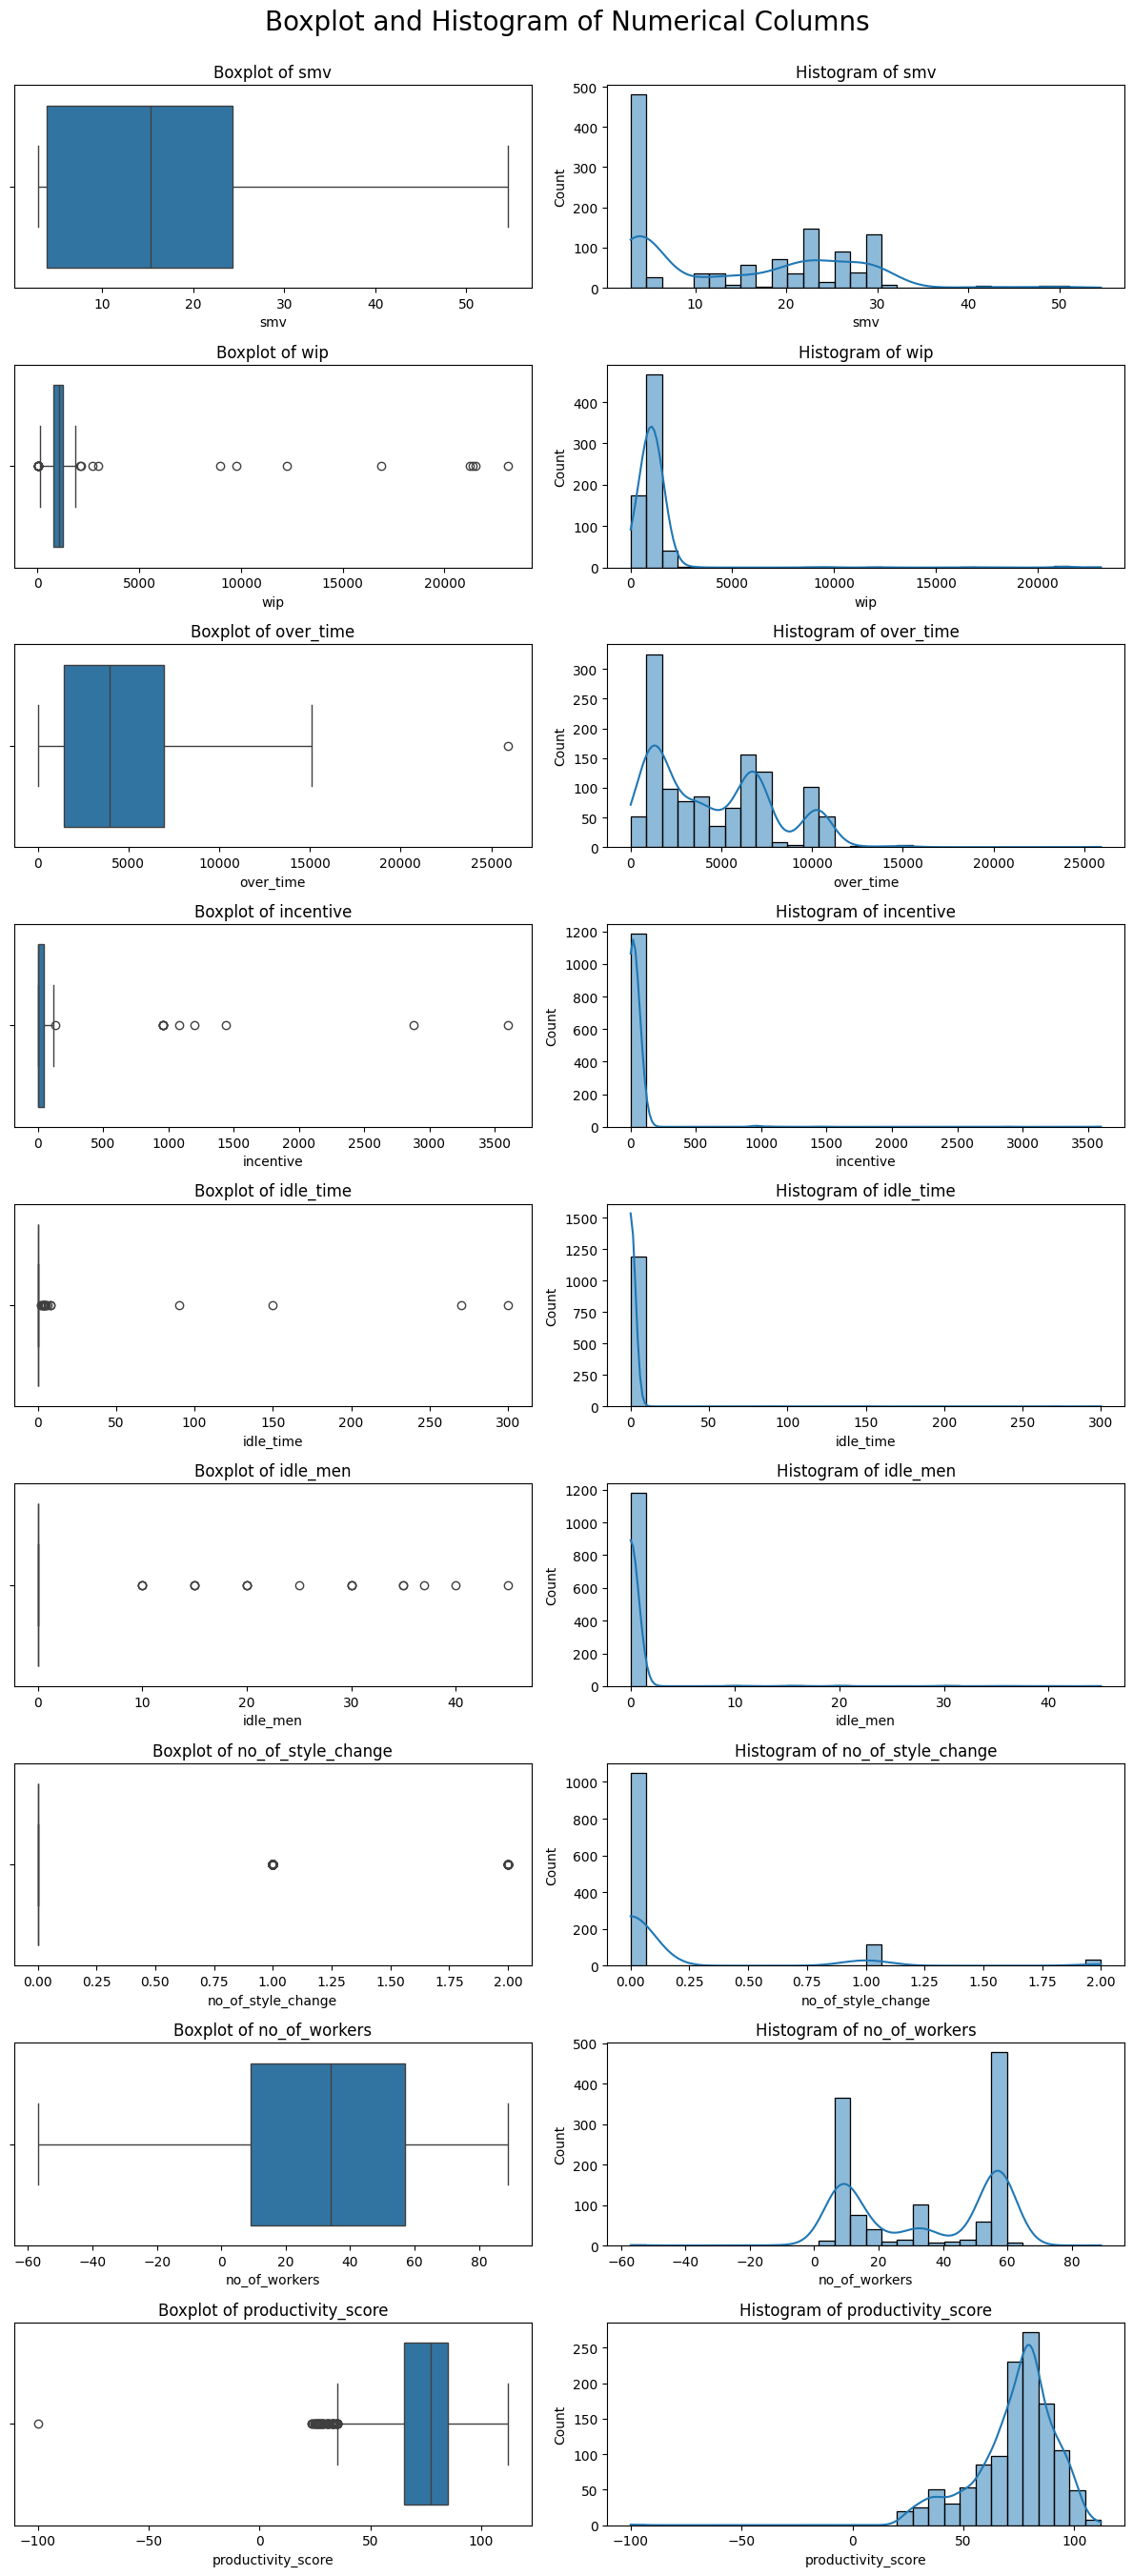

In [292]:
num_plot(data)

- wip, over_time, incentive, idle_time, and idle_men has outliers
- no_of_workers and productivity_score have negative values

#### Plot for Categorical Data

In [293]:
def cat_plot(data):
    cat_cols = data.select_dtypes(exclude=['number', 'datetime']).columns
    n = len(cat_cols)
    fig, axes = plt.subplots(nrows=round(n/2), ncols=2, figsize=(12, 2 * n))

    for i, col in enumerate(cat_cols):
        order = data[col].value_counts().index
        sns.countplot(data=data, x=col, ax=axes[round(i/2), i%2], order=order)
        axes[round(i/2), i%2].set_title(f'Barplot of {col}')

    fig.suptitle("Barplot of Numerical Columns", fontsize=20, y=1)
    plt.tight_layout()
    plt.show()

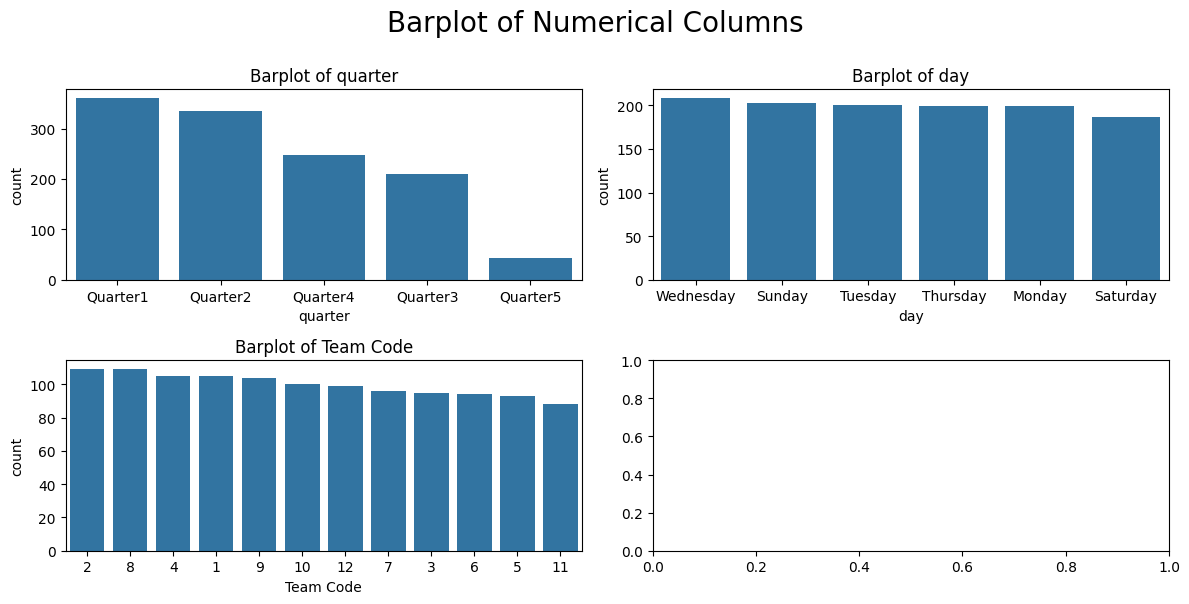

In [294]:
cat_plot(data)

- The distibution of team_code and day are pretty uniform, which is nice

### Outliers

#### Work In Progress

In [295]:
data[data["wip"]>5000]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
561,2015-02-02,Quarter1,Monday,1,22.94,16882.0,7020,113,0.0,0,0,58.5,100.060
563,2015-02-02,Quarter1,Monday,2,22.52,21385.0,7020,88,0.0,0,0,58.5,90.016
564,2015-02-02,Quarter1,Monday,3,22.52,21266.0,6840,70,0.0,0,0,57.0,90.014
565,2015-02-02,Quarter1,Monday,10,22.52,21540.0,6720,88,0.0,0,0,56.0,90.013
568,2015-02-02,Quarter1,Monday,12,15.26,12261.0,3600,63,0.0,0,0,35.0,80.040
569,2016-02-02,Quarter1,Monday,4,22.52,23122.0,5940,50,0.0,0,0,56.5,80.039
570,2016-02-02,Quarter1,Monday,9,29.12,8992.0,6960,55,0.0,0,0,58.0,79.996
572,2015-02-02,Quarter1,Monday,11,20.55,9792.0,6480,60,0.0,0,0,54.0,70.040


#### Overtime

In [296]:
data[data["over_time"]>16000]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
146,2016-01-08,Quarter2,Thursday,11,12.52,287.0,25920,38,0.0,0,0,54.0,34.995


#### Incentive

In [297]:
data[data["incentive"]>500]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
1128,2015-03-09,Quarter2,Monday,11,2.90,NaN,0,960,0.0,0,0,8.0,96.062
1129,2015-03-09,Quarter2,Monday,12,4.60,NaN,0,1080,0.0,0,0,9.0,90.296
1130,2015-03-09,Quarter2,Monday,5,3.94,NaN,0,2880,0.0,0,0,12.0,86.434
1133,2015-03-09,Quarter2,Monday,9,2.90,NaN,0,3600,0.0,0,0,15.0,84.100
1137,2016-03-08,Quarter2,Monday,3,4.60,NaN,0,1440,0.0,0,0,12.0,79.542
1138,2016-03-08,Quarter2,Monday,4,3.94,NaN,0,960,0.0,0,0,8.0,79.539
1139,2016-03-08,Quarter2,Monday,1,3.94,NaN,0,960,0.0,0,0,8.0,79.457
1143,2016-03-08,Quarter2,Monday,2,3.90,NaN,0,1200,0.0,0,0,10.0,68.250
1148,2016-03-08,Quarter2,Monday,10,2.90,NaN,0,960,0.0,0,0,8.0,47.729
1149,2016-03-08,Quarter2,Monday,8,3.90,NaN,0,960,0.0,0,0,8.0,26.406


#### Idle Time

In [298]:
data[data["idle_time"]>50]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
615,2015-02-04,Quarter1,Wednesday,5,30.10,326.0,5820,0,90.0,10,0,58.5,65.083
617,2015-02-04,Quarter1,Wednesday,4,30.10,287.0,6060,23,150.0,15,0,55.5,35.071
650,2016-02-07,Quarter1,Saturday,7,24.26,658.0,6960,0,270.0,45,0,58.0,66.227
654,2015-02-07,Quarter1,Saturday,8,24.26,652.0,6840,0,300.0,37,0,57.0,36.532


#### Idle Men

In [299]:
data[data["idle_men"]>5]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
615,2015-02-04,Quarter1,Wednesday,5,30.10,326.0,5820,0,90.0,10,0,58.5,65.083
617,2015-02-04,Quarter1,Wednesday,4,30.10,287.0,6060,23,150.0,15,0,55.5,35.071
650,2016-02-07,Quarter1,Saturday,7,24.26,658.0,6960,0,270.0,45,0,58.0,66.227
654,2015-02-07,Quarter1,Saturday,8,24.26,652.0,6840,0,300.0,37,0,57.0,36.532
775,2015-02-15,Quarter3,Sunday,8,30.10,507.0,5880,40,2.0,10,1,59.0,70.057
798,2015-02-16,Quarter3,Monday,8,30.10,7.0,7080,27,2.0,10,2,59.0,62.197
818,2015-02-17,Quarter3,Tuesday,8,29.40,179.0,0,23,5.0,30,2,58.0,60.098
822,2016-02-17,Quarter3,Tuesday,10,18.22,741.0,0,0,8.0,35,1,49.0,30.212
841,2016-02-18,Quarter3,Wednesday,10,19.68,1119.0,5640,0,8.0,35,1,47.0,30.357
843,2016-02-18,Quarter3,Wednesday,8,29.40,962.0,4560,0,4.5,30,2,57.0,25.140


### Confusing Data

#### Quarter 5 data

In [300]:
data[data["quarter"] == "Quarter5"].head()

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
498,2015-01-29,Quarter5,Thursday,2,22.52,1416.0,6840,113,0.0,0,0,57.0,100.023
499,2015-01-29,Quarter5,Thursday,4,4.30,NaN,1200,0,0.0,0,0,10.0,98.900
500,2015-01-29,Quarter5,Thursday,3,22.52,1287.0,6840,100,0.0,0,0,57.0,95.019
501,2016-01-29,Quarter5,Thursday,4,22.52,1444.0,6900,88,0.0,0,0,57.5,90.080
502,2015-01-29,Quarter5,Thursday,10,22.52,1088.0,6720,88,0.0,0,0,56.0,90.013


In [301]:
quarter_min_max = []

for quarter in data["quarter"].unique():
    quarter_date = data[data["quarter"] == quarter]["date"]
    mmdd = quarter_date.dt.strftime("%m-%d")

    min_mmdd = mmdd.min()
    max_mmdd = mmdd.max()

    min_date = quarter_date[mmdd == min_mmdd].iloc[0].strftime("%d %b")
    max_date = quarter_date[mmdd == max_mmdd].iloc[0].strftime("%d %b")

    quarter_min_max.append({"Quarter": quarter, "Min Date": min_date, "Max Date": max_date})

quarter_min_max_df = pd.DataFrame(quarter_min_max)
quarter_min_max_df

,Quarter,Min Date,Max Date
0,Quarter1,01 Jan,07 Mar
1,Quarter2,08 Jan,11 Mar
2,Quarter3,15 Jan,19 Feb
3,Quarter4,22 Jan,28 Feb
4,Quarter5,29 Jan,31 Jan


Quarter 5's date is between 29 jan and 31 jan, which is part of quarter 1

#### Negative no_of_workers

In [302]:
data[data["no_of_workers"]<0]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
66,2016-01-05,Quarter1,Monday,9,2.90,NaN,1920,0,0.0,0,0,-8.0,82.083
79,2016-01-05,Quarter1,Monday,3,19.87,944.0,6600,45,0.0,0,0,-55.0,75.024
503,2015-01-29,Quarter5,Thursday,6,2.90,NaN,1200,0,0.0,0,0,-10.0,89.900
610,2015-02-04,Quarter1,Wednesday,6,18.79,941.0,3360,30,0.0,0,0,-33.0,70.071
697,2016-02-10,Quarter2,Tuesday,2,22.52,1512.0,0,88,0.0,0,0,-57.0,89.998


#### Negative productivity_score

In [303]:
data[data["productivity_score"]<0]

,date,quarter,day,Team Code,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_score
1120,2015-03-08,Quarter2,Sunday,10,21.82,1335.0,6000,30,0.0,0,0,50.0,-100.0


### EDA Insights

1. **Missing Values**
   - wip has 506 missing values out of 1197 rows, which makes it 42% of the data. 
   - Other columns do not have any missing values. 
2. **Duplicated Values**
   - There are no duplicated values in the dataset.
3. **Datatypes**
   - Date's datatype is object, it need to be converted as datetime.
   - Team Code datatype is int, since it does not show oreder, it need to be converted as category.
   - wip datatype can be converted to int
   - no_of_workers datatype is float, since worker cannot be a decimal, it need to be converted as int.
4. **Inconsistent Data**
   - Date format is not consistent.
   - Quarter column has "Quarter5" data.
5. **Data Visualization**
   - Several columns has outliers.
   - Overtime value are pretty big.
   - Several columns has negative values, where is shouldn't.
   - Most of the numerical data distribution are skewed.
   - Most of the categorical data distribution are uniform.
6. **Outliers**
   - wip, overtime, incentive, idle_time, and idle_men have extreme outliers.
7. **Confusing Data**
   - Quarter 5 data can be changed into quarter 1.
   - no_of_workers and productivity_score have values under 0.

## Data Cleaning

## Data Preprocessing

### To-do:

- Scale numerical columns

## Baseline Model

## Hyperparameter Fine-Tuning

## Evaluation